In [2]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.extend(['//anaconda/lib/python2.7/site-packages', '//anaconda/lib/site-python'])

import re
import requests
import nltk
from nltk.corpus import stopwords


from bs4 import BeautifulSoup
from tswift import Song
from tswift import Artist
import billboard
import os
import glob
import numpy as np
import pandas as pd


def get_stopwords():
	with open('stopwords.txt', 'rb') as f:
		words = f.read().splitlines()
	return set(words)

def remove_stopwords(lyrics):
    f_lyrics = lyrics[:]
    swords = get_stopwords()
    for word in lyrics:
        if word in get_stopwords():
            f_lyrics.replace(word, '')
    return (f_lyrics)
            

def remove_nonalphanum(text):
    # Names should contain only lowercase alphanumeric characters and spaces.
    text = text.replace('-', ' ').lower()
    text = (re.sub(r'[^\w\- ]+', '', text))
#    text = text.replace(' ', '-')
    return text

def unique_words(lyrics):
#	words = lyrics.replace("'",'').replace('"','').replace('?','').replace('!','').replace('(').replace(')').replace('.','').replace(',','').replace('-','').split(' ')
	words = remove_nonalphanum(lyrics)
	return (words)

def filter_by_artists(artist):
    return df_lyric.loc[df_lyric['Artist'] == artist]

def filter_by_year(year):
    if len(year) == 4:
        return df_lyric.loc[df_lyric['ChartYear'] == year]
    else:
        return "invalid year"

def words_by_artist(artist):
    return remove_nonalphanum(' '.join(df_lyric.loc[df_lyric['Artist'] == artist,'lyric']))

def words_by_year(year):
    return remove_nonalphanum(' '.join(df_lyric.loc[df_lyric['ChartYear'] == year,'lyric']))

def funwords():
    w = ['love', 'money', 'body', 'foul', 'hate', 'sex', 'sexy', 'kill', 'boys', 'girls', 'men', 'women', 'smile', 'home', 'kiss', 'happy', 'baby', 'heart', 'lonely', 'sad']
    return w

In [3]:
lyric_list = []
set(os.listdir('lyrics/')) & set(os.listdir('track-data/')) #re run part of code that builds track name to build year.artist.track

# print len(set(os.listdir('lyrics/')) & set(os.listdir('track-data/')))
for key in (set(os.listdir('lyrics/')) & set(os.listdir('track-data/'))):
	lyric_dict = {}
	lyric_dict['file'] = key
	if key.find('.txt') > 0:
		with open(os.path.join('lyrics/', key)) as lyric_f:
			lyric_dict['lyric'] = ' '.join(lyric_f.readlines())
	
		with open(os.path.join('track-data/', key)) as track_f:
			ChartYear, Artist, Title, _ = track_f.readline().split('|', 3)
			lyric_dict['ChartYear'] = ChartYear
			lyric_dict['Artist'] = Artist
			lyric_dict['Title'] = Title
	
		lyric_list.append(lyric_dict)
#print lyric_dict	
df_lyric = pd.DataFrame(lyric_list)

In [9]:
taylor = words_by_artist('taylor-swift')

In [4]:
import sys
import codecs
import nltk
from nltk.corpus import stopwords
from collections import Counter
default_stopwords = set(nltk.corpus.stopwords.words('english'))

stopwords_file = './stopwords.txt'
custom_stopwords = set(codecs.open(stopwords_file, 'r', 'utf-8').read().splitlines())

all_stopwords = default_stopwords | custom_stopwords

def get_wordfreq_df(year):

    wordbag = vocab.decode('utf-8')#words_by_year(year)
    words = nltk.word_tokenize(wordbag)

    # Remove single-character & 2-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 2]

    # Remove numbers
    words = [word for word in words if not word.isdigit()]

    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]

    #remove stopwords
    words = [word for word in words if word not in all_stopwords]
    #print words
    fdist = nltk.FreqDist(words)
    #for word, frequency in fdist.most_common(50):
        #print word, frequency
    d = Counter(fdist)
    word_df = pd.DataFrame.from_dict(d, orient='index').reset_index()
    word_df = word_df.rename(columns={'index':'Word',0:'count'})

    df = pd.DataFrame(fdist.most_common(25))
    df.columns = ['Words', 'Count']
    df.sort_index(ascending=False).plot(
        kind='barh',
        x = 'Words',
        title = "Most Common Lyrics in: " + year,
    )
#    plt.hist(df.Count, alpha=.3)
#    sns.rugplot(df.Count);
    return pd.DataFrame(fdist.most_common(100))

In [335]:
from os import path
from wordcloud import WordCloud


def get_wordcloud_year(year):
    wordbag = words_by_year(year)

    words = remove_nonalphanum(wordbag)
    print 0, len(words)

    words = words.split()
    # Remove single-character & 2-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 2]
    print 1, len(words)

    # Remove numbers
    words = [word for word in words if not word.isdigit()]
    print 2, len(words)

    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]
    print 3, len(words)

    #remove stopwords
    words = [word for word in words if word not in all_stopwords]
    print 4, len(words)

    #wordcloud = WordCloud().generate(words)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
   # plt.imshow(wordcloud)
    plt.axis("off")

    # lower max_font_size
    #wordcloud = WordCloud(max_font_size=50).generate()   (str(words))
    plt.figure()
    #plt.imshow(wordcloud)
    plt.axis("off")
    #plt.show()
    print(len(words))


    wordcloud = WordCloud(width = 1000, height = 750, font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 1.0,
                      stopwords = all_stopwords,
                      ).generate(' '.join(words))
    plt.figure(figsize=(20,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [278]:
wordbag = words_by_year(year)

words = remove_nonalphanum(wordbag)
words = words.split()
words = [word for word in words if len(word) > 2]
words = [word for word in words if not word.isdigit()]
words = [word.lower() for word in words]
words = [word for word in words if word not in all_stopwords]


In [ ]:
l = get_wordfreq_df('1987')

In [329]:
vocasb

,Artist,ChartYear,Title,file,lyric
0,ub40,1991,here-i-am,1991-ub40-here-i-am.txt,I can't believe that it's real The way that yo...
1,webbie-lil-phat-&-lil-boosie,2008,independent,2008-webbie-lil-phat-&-lil-boosie-independent.txt,Who's to know if your soul will fade at all Th...
2,tracy-byrd,2003,the-truth-about-men,2003-tracy-byrd-the-truth-about-men.txt,"We don't like to go out shopping, we don't car..."
3,troye-sivan,2016,youth,2016-troye-sivan-youth.txt,What if What if we run away What if What if we...
4,backstreet-boys,2000,shape-of-my-heart,2000-backstreet-boys-shape-of-my-heart.txt,"Baby, please try to forgive me Stay here don't..."
5,alicia-keys,2003,you-dont-know-my-name,2003-alicia-keys-you-dont-know-my-name.txt,"Baby, baby, baby From the day I saw you Really..."
6,red-hot-chili-peppers,2000,californication,2000-red-hot-chili-peppers-californication.txt,Psychic spies from China Try to steal your min...
7,three-days-grace,2007,never-too-late,2007-three-days-grace-never-too-late.txt,This world will never be What I expected And i...
8,petey-pablo,2001,raise-up,2001-petey-pablo-raise-up.txt,"I Like them girls, check it out! I like them g..."
9,trisha-yearwood,1998,there-goes-my-baby,1998-trisha-yearwood-there-goes-my-baby.txt,He was the kind of guy who loved so unselfishl...


In [7]:
words1988 = words_by_year('1988')
words1989 = words_by_year('1989')
words1990 = words_by_year('1990')
words1991 = words_by_year('1991')
words1992 = words_by_year('1992')
words1993 = words_by_year('1993')
words1994 = words_by_year('1994')
words1995 = words_by_year('1995')
words1996 = words_by_year('1996')
words1997 = words_by_year('1997')
words1998 = words_by_year('1998')
words1999 = words_by_year('1999')
words2000 = words_by_year('2000')
words2001 = words_by_year('2001')
words2002 = words_by_year('2002')
words2003 = words_by_year('2003')
words2004 = words_by_year('2004')
words2005 = words_by_year('2005')
words2006 = words_by_year('2006')
words2007 = words_by_year('2007')
words2008 = words_by_year('2008')
words2009 = words_by_year('2009')
words2010 = words_by_year('2010')
words2011 = words_by_year('2011')
words2012 = words_by_year('2012')
words2013 = words_by_year('2013')
words2014 = words_by_year('2014')
words2015 = words_by_year('2015')
words2016 = words_by_year('2016')
words2017 = words_by_year('2017')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = ' '.join(df_lyric['lyric'])#['The swimmer likes swimming so he swims.']
vec = CountVectorizer(analyzer=u'word',stop_words="english").fit([vocab])

sentence1 = vec.transform([words1988])
sentence2 = vec.transform([words1989])
sentence3 = vec.transform([words1990])
sentence4 = vec.transform([words1991])
sentence5 = vec.transform([words1992])
sentence6 = vec.transform([words1993])
sentence7 = vec.transform([words1994])
sentence8 = vec.transform([words1995])
sentence9 = vec.transform([words1996])
sentence10 = vec.transform([words1997])
sentence11 = vec.transform([words1998])
sentence12 = vec.transform([words1999])
sentence13 = vec.transform([words2000])
sentence14 = vec.transform([words2001])
sentence15 = vec.transform([words2002])
sentence16 = vec.transform([words2003])
sentence17 = vec.transform([words2004])
sentence18 = vec.transform([words2005])
sentence19 = vec.transform([words2006])
sentence20 = vec.transform([words2007])
sentence21 = vec.transform([words2008])
sentence22 = vec.transform([words2009])
sentence23 = vec.transform([words2010])
sentence24 = vec.transform([words2011])
sentence25 = vec.transform([words2012])
sentence26 = vec.transform([words2013])
sentence27 = vec.transform([words2014])
sentence28 = vec.transform([words2015])
sentence29 = vec.transform([words2016])
sentence30 = vec.transform([words2017])

#print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())
print('Sentence 3: %s' %sentence3.toarray())
print('Sentence 4: %s' %sentence4.toarray())
print('Sentence 5: %s' %sentence5.toarray())

df1 = pd.DataFrame()
df1['Words'] = vec.get_feature_names()
# df1['1988'] = sentence1
# df1['1989'] = sentence2
# df1['1990'] = sentence3
# df1['1991'] = sentence4
# df1['1992'] = sentence5
df1['1988'] = sentence1.toarray()[0]
df1['1989'] = sentence2.toarray()[0]
df1['1990'] = sentence3.toarray()[0]
df1['1991'] = sentence4.toarray()[0]
df1['1992'] = sentence5.toarray()[0]
df1['1993'] = sentence6.toarray()[0]
df1['1994'] = sentence7.toarray()[0]
df1['1995'] = sentence8.toarray()[0]
df1['1996'] = sentence9.toarray()[0]
df1['1997'] = sentence10.toarray()[0]
df1['1998'] = sentence11.toarray()[0]
df1['1999'] = sentence12.toarray()[0]
df1['2000'] = sentence13.toarray()[0]
df1['2001'] = sentence14.toarray()[0]
df1['2002'] = sentence15.toarray()[0]
df1['2003'] = sentence16.toarray()[0]
df1['2004'] = sentence17.toarray()[0]
df1['2005'] = sentence18.toarray()[0]
df1['2006'] = sentence19.toarray()[0]
df1['2007'] = sentence20.toarray()[0]
df1['2008'] = sentence21.toarray()[0]
df1['2009'] = sentence22.toarray()[0]
df1['2010'] = sentence23.toarray()[0]
df1['2011'] = sentence24.toarray()[0]
df1['2012'] = sentence25.toarray()[0]
df1['2013'] = sentence26.toarray()[0]
df1['2014'] = sentence27.toarray()[0]
df1['2015'] = sentence28.toarray()[0]
df1['2016'] = sentence29.toarray()[0]
df1['2017'] = sentence30.toarray()[0]

#sns.kdeplot('Words', data=df1, fit_reg=False)

Sentence 1: [[0 0 0 ..., 0 0 0]]
Sentence 2: [[0 0 0 ..., 0 0 0]]
Sentence 3: [[0 0 0 ..., 0 0 0]]
Sentence 4: [[0 0 0 ..., 0 0 0]]
Sentence 5: [[0 0 0 ..., 0 0 0]]


In [16]:
top20 = df1.sum(axis=1).nlargest(n=25).index

In [ ]:
g = sns.FacetGrid(df1, col="Words")  
g.map(sns.distplot, "Words")  

In [14]:
top20

Int64Index([14364, 16933,  8730, 16524, 15850, 19773, 15490, 12362,  1977,
            32058, 31043, 32191,  4851, 17269, 28910, 16374, 12102, 24568,
            31176,  5992],
           dtype='int64')

In [11]:
sns.plot(kind=barh, df1.iloc[top20], x ="Words")

SyntaxError: non-keyword arg after keyword arg (<ipython-input-11-13791818afb9>, line 1)

In [17]:
df1.iloc[top20]

,Words,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
14364,im,1124,1226,989,1123,1348,1445,1331,1174,1143,...,2110,2699,2996,3081,1994,2064,1882,2578,2611,710
16933,love,2201,1714,1514,1437,2086,1506,1408,1295,1015,...,1049,1250,1542,1361,1208,1250,1277,1442,1234,308
8730,dont,1175,1225,1122,953,1079,1062,1030,932,1017,...,1199,1525,1596,1449,1441,1501,1502,1714,1822,600
16524,like,723,648,660,568,624,1061,909,908,895,...,1468,1630,1911,2246,1632,1619,1532,1772,1827,422
15850,know,1047,1074,982,1108,1016,999,983,901,755,...,1242,1619,1245,1287,1165,1368,1289,1477,1728,513
19773,oh,1110,1293,1074,872,536,499,673,661,632,...,1261,1858,1992,2904,1778,2263,1690,1627,2124,611
15490,just,932,914,920,943,1040,857,696,737,736,...,1177,1244,1363,1430,1076,1266,1107,1160,1269,336
12362,got,592,729,731,554,732,615,643,624,752,...,982,1013,998,1203,938,1134,1073,1516,1420,375
1977,baby,862,952,973,1099,1007,761,718,719,769,...,750,919,1433,1084,964,895,843,956,979,226
32058,yeah,560,556,700,614,749,611,410,489,492,...,737,867,1196,1624,1265,1112,945,858,1130,251


In [21]:
print Song(title='we-built-this-city', artist='starship',).lyrics.format()

Say, "You don't know me or recognize my face"
Say, "You don't care who goes to that kind of place"
Knee deep in the hoopla sinking in your fight
Too many runaways eating up the night

Marconi plays the Mamba, listen to the radio, don't you remember
We built this city, we built this city on rock and roll
We built this city, we built this city on rock and roll
Built this city, we built this city on rock and roll

Someone always playing corporation games
Who cares they're always changing corporation names
We just want to dance here, someone stole the stage
They call us irresponsible, write us off the page

Marconi plays the Mamba, listen to the radio, don't you remember
We built this city, we built this city on rock and roll
We built this city, we built this city on rock and roll
Built this city, we built this city on rock and roll

It's just another Sunday, in a tired old street
Police have got the choke hold, oh, then we just lost the beat

Who counts the money, underneath the bar
Who r

In [18]:
df1

,Words,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,1,0
6,06,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
7,07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
8,08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,09,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,0,0,2,1


In [129]:

from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer

#######
# based on http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems
######## 

vect = CountVectorizer(tokenizer=tokenize, stop_words='english') 

vect.fit(vocab)

sentence1 = vect.transform(['The swimmer likes swimming.'])
sentence2 = vect.transform(['The swimmer swims.'])

print('Vocabulary: %s' %vect.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

ValueError: Iterable over raw text documents expected, string object received.

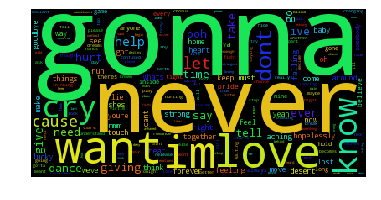

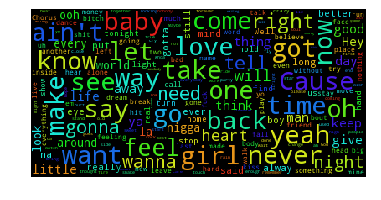

In [323]:
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
"""

from os import path
from wordcloud import WordCloud
# Read the whole text.
#text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
a = words_by_artist('rick-astley')
wordcloud = WordCloud().generate(a)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=30).generate(vocab)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
#image = wordcloud.to_image()
#image.show()

In [284]:
stopwords

<WordListCorpusReader in u'/Users/scottedenbaum/nltk_data/corpora/stopwords'>

<WordListCorpusReader in u'/Users/scottedenbaum/nltk_data/corpora/stopwords'>
